In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.impute import SimpleImputer

In [2]:
nba_df = pd.read_csv('./NBA_Dataset_csv.csv')

In [3]:
nba_df.head()

,Team,Points_Scored,Weightlifting_Sessions_Average,Yoga_Sessions_Average,Laps_Run_Per_Practice_Average,Water_Intake,Players_Absent_For_Sessions
0,Lakers,242,23.0,25.0,30.0,5.0,4.0
1,Lakers,144,24.0,26.0,31.0,5.0,8.0
2,Lakers,156,24.0,27.0,31.0,5.0,7.0
3,Lakers,159,26.0,29.0,34.0,5.0,1.0
4,Lakers,106,27.0,NaN,34.0,5.0,6.0


In [4]:
nba_df.isnull().sum()

Team                               0
Points_Scored                      0
Weightlifting_Sessions_Average     9
Yoga_Sessions_Average             20
Laps_Run_Per_Practice_Average     14
Water_Intake                      14
Players_Absent_For_Sessions       29
dtype: int64

In [5]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Team                            159 non-null    object 
 1   Points_Scored                   159 non-null    int64  
 2   Weightlifting_Sessions_Average  150 non-null    float64
 3   Yoga_Sessions_Average           139 non-null    float64
 4   Laps_Run_Per_Practice_Average   145 non-null    float64
 5   Water_Intake                    145 non-null    float64
 6   Players_Absent_For_Sessions     130 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.8+ KB


In [6]:
nba_df.describe()

,Points_Scored,Weightlifting_Sessions_Average,Yoga_Sessions_Average,Laps_Run_Per_Practice_Average,Water_Intake,Players_Absent_For_Sessions
count,159.000000,1.500000e+02,139.000000,145.000000,145.000000,130.000000
mean,119.327044,7.433120e+03,21.690647,30.972414,3.648276,4.415385
std,52.354983,9.071972e+04,11.439728,11.979117,1.804820,2.202129
min,0.000000,8.000000e+00,3.000000,9.000000,1.000000,1.000000
25%,96.500000,1.900000e+01,13.000000,23.000000,2.000000,3.000000
50%,125.000000,2.400000e+01,19.000000,29.000000,3.000000,4.000000
75%,151.500000,3.300000e+01,28.000000,40.000000,5.000000,6.000000
max,250.000000,1.111111e+06,63.000000,68.000000,8.000000,8.000000


In [7]:
nba_df.columns

Index(['Team', 'Points_Scored', 'Weightlifting_Sessions_Average',
       'Yoga_Sessions_Average', 'Laps_Run_Per_Practice_Average',
       'Water_Intake', 'Players_Absent_For_Sessions'],
      dtype='object')

In [8]:
# rename columns
df = nba_df.rename(columns={
    'Weightlifting_Sessions_Average': 'Weightlifting_avg',
    'Yoga_Sessions_Average': 'Yoga_avg',
    'Laps_Run_Per_Practice_Average': 'laps_avg',
    'Players_Absent_For_Sessions': 'players_absent'
})

In [16]:
df.columns = df.columns.map(lambda x: x.lower())

In [17]:
df.head()

,team,points_scored,weightlifting_avg,yoga_avg,laps_avg,water_intake,players_absent
0,Lakers,242,23.0,25.0,30.0,5.0,4.0
1,Lakers,144,24.0,26.0,31.0,5.0,8.0
2,Lakers,156,24.0,27.0,31.0,5.0,7.0
3,Lakers,159,26.0,29.0,34.0,5.0,1.0
4,Lakers,106,27.0,NaN,34.0,5.0,6.0


In [19]:
df.describe()

,points_scored,weightlifting_avg,yoga_avg,laps_avg,water_intake,players_absent
count,159.000000,1.500000e+02,139.000000,145.000000,145.000000,130.000000
mean,119.327044,7.433120e+03,21.690647,30.972414,3.648276,4.415385
std,52.354983,9.071972e+04,11.439728,11.979117,1.804820,2.202129
min,0.000000,8.000000e+00,3.000000,9.000000,1.000000,1.000000
25%,96.500000,1.900000e+01,13.000000,23.000000,2.000000,3.000000
50%,125.000000,2.400000e+01,19.000000,29.000000,3.000000,4.000000
75%,151.500000,3.300000e+01,28.000000,40.000000,5.000000,6.000000
max,250.000000,1.111111e+06,63.000000,68.000000,8.000000,8.000000


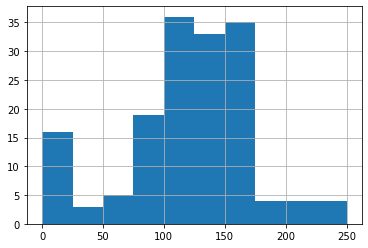

In [21]:
df['points_scored'].hist();

/Users/deepshika/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


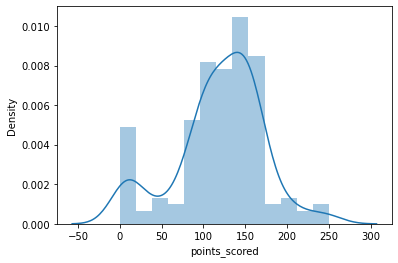

In [24]:
sns.distplot(df['points_scored']);

We tried using np.log but it gives infinity error since log of zero is infinity

/Users/deepshika/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


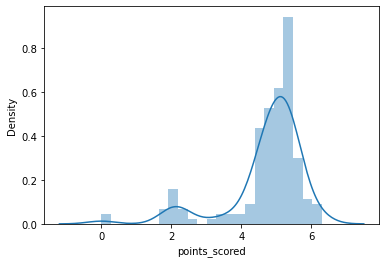

In [28]:
sns.distplot(np.cbrt(df['points_scored']));

/Users/deepshika/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


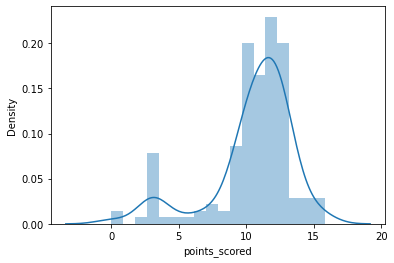

In [26]:
sns.distplot(np.sqrt(df['points_scored']));

/Users/deepshika/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


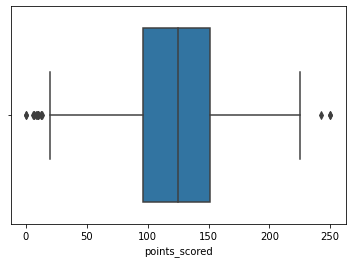

In [29]:
sns.boxplot(df['points_scored']);

In [43]:
def plot_box_violin(df, x, y):
    fig, axes = plt.subplots(1,2, figsize=(18,10))
    fig.suptitle(f'Violin and Box Plots for variable: {y}')
    
    sns.violinplot(ax=axes[0], x=x, y=y, data=df)
    sns.boxplot(ax=axes[1], data=df[y])
    
    axes[0].set_title(f'Violin plot for variable: {y}')
    axes[1].set_title(f'Box plot for variable: {y}');
    
    

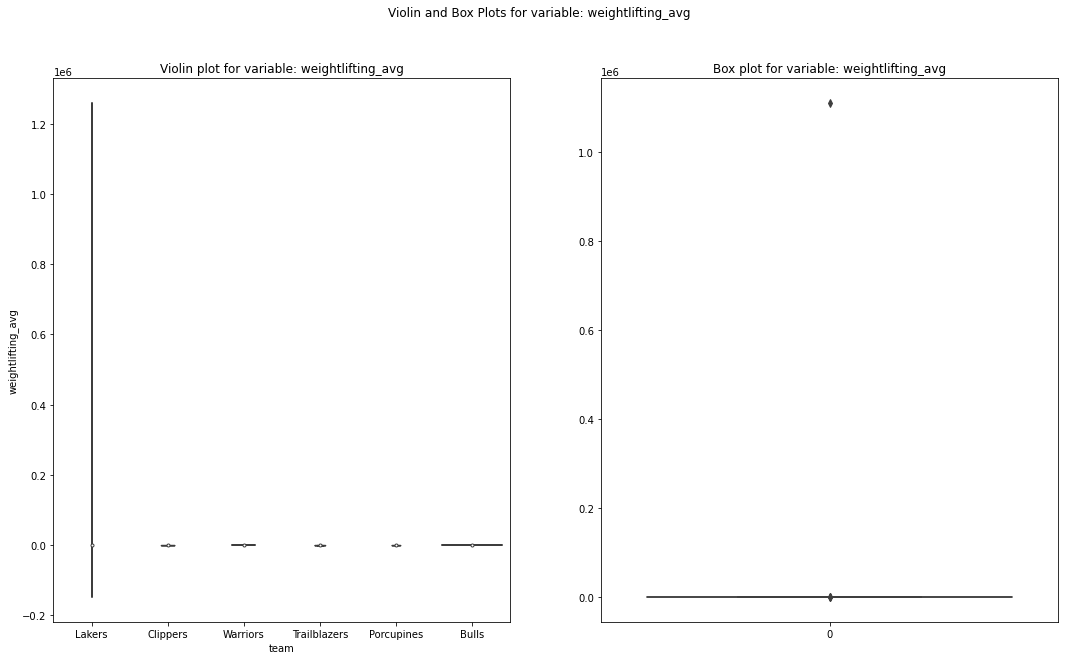

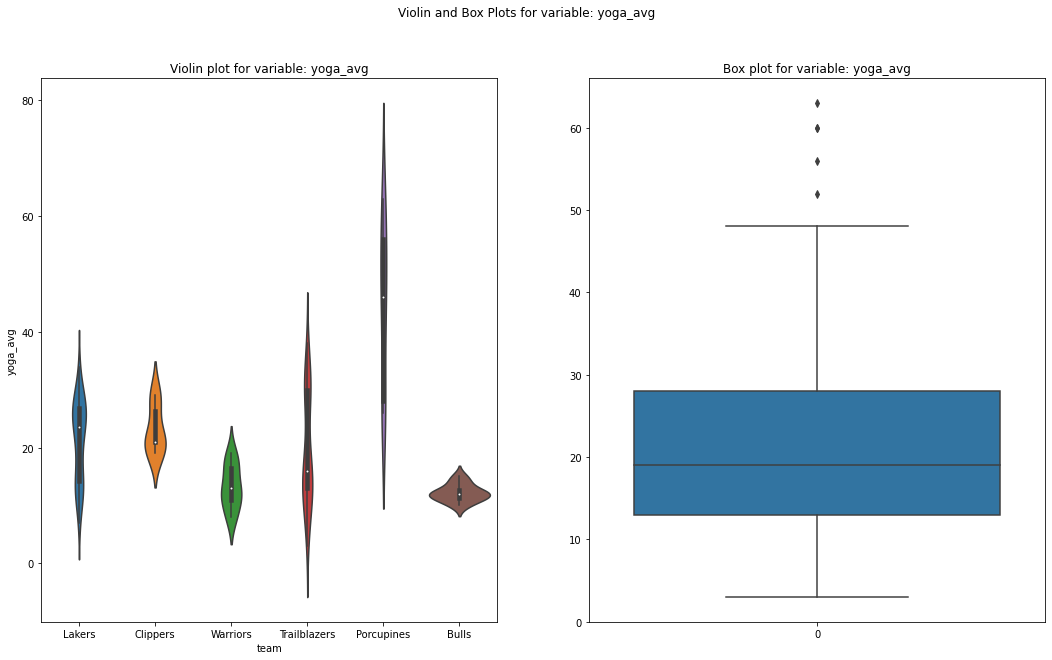

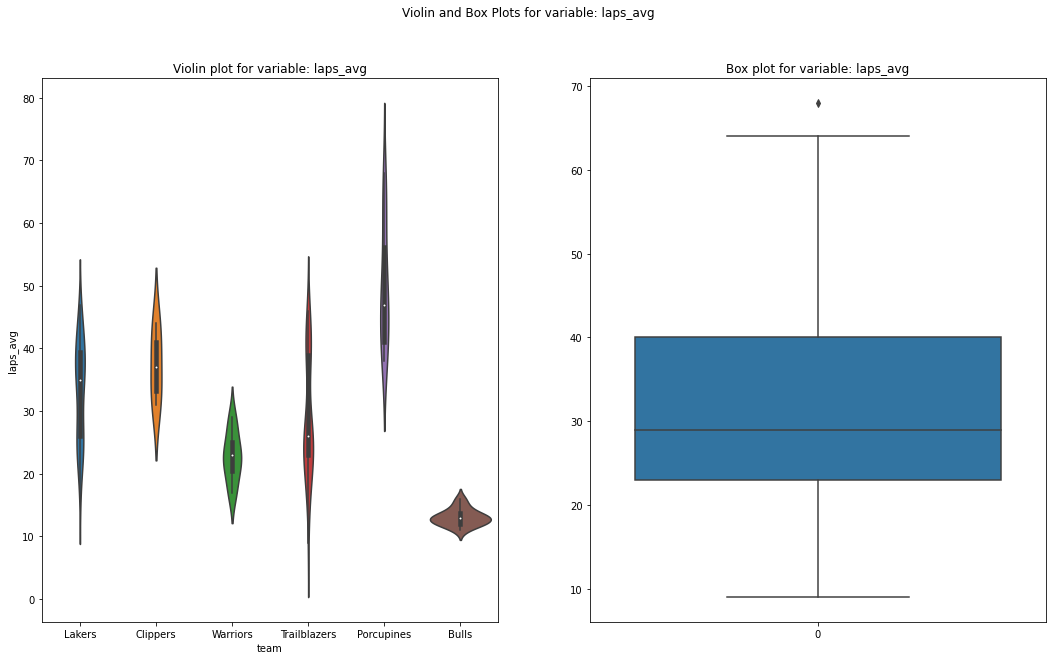

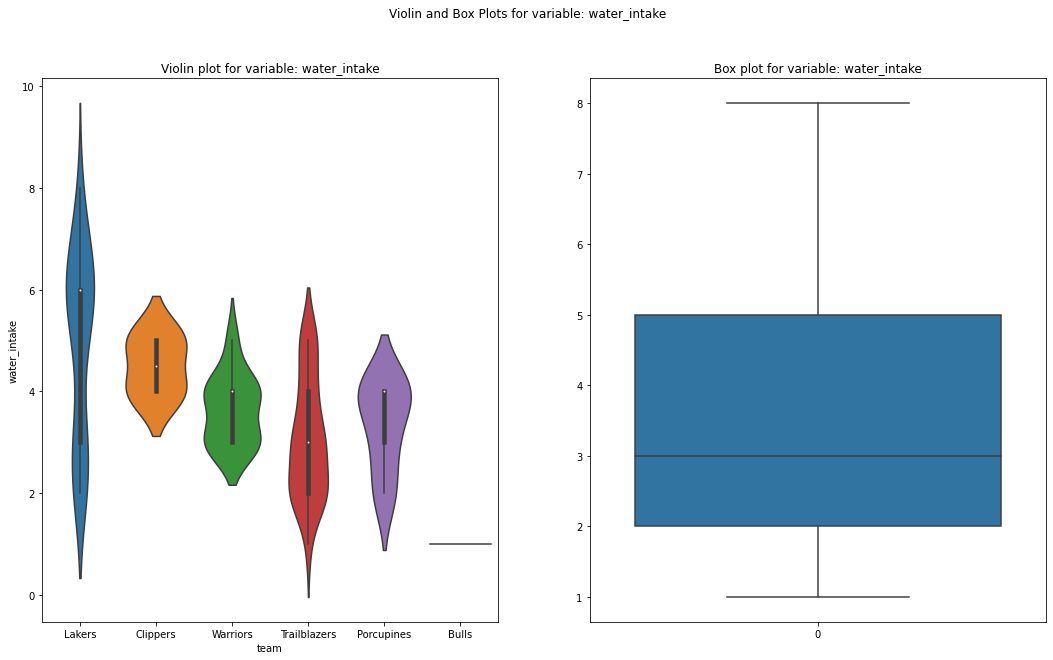

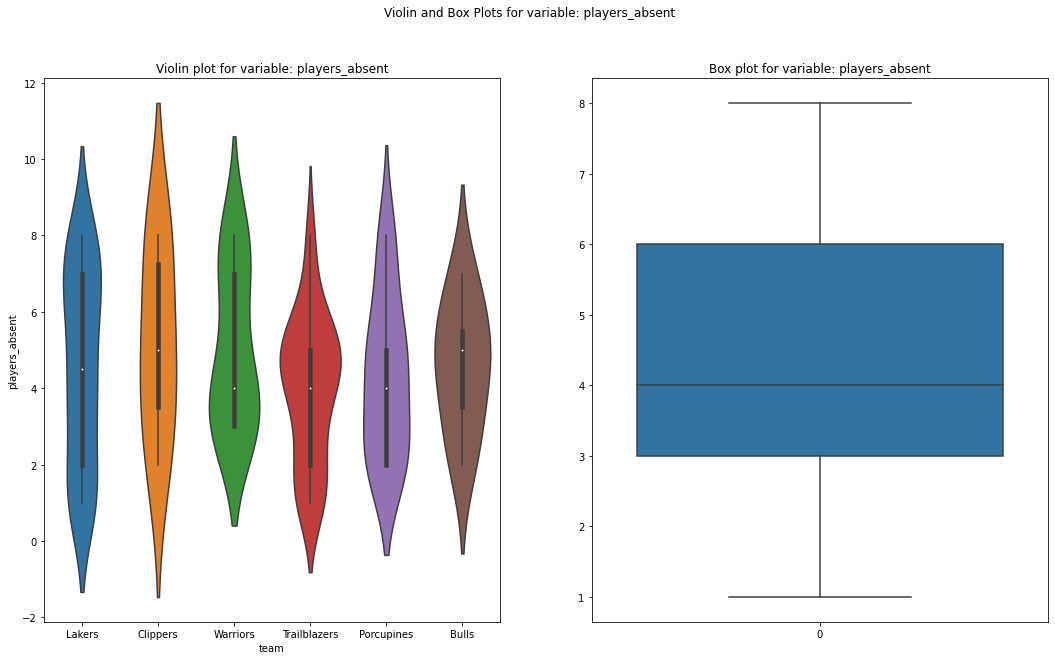

In [44]:
for col in ['weightlifting_avg', 'yoga_avg', 'laps_avg', 'water_intake', 'players_absent']:
    plot_box_violin(df=df, x='team', y=col)

## Outliers

In [45]:
# finding outliers

def outlier(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_end = q3 + 1.5 * iqr
    lower_end = q1 - 1.5 * iqr
    
    outlier = df[(df[column] > upper_end) | (df[column] < lower_end)]
    return outlier

In [50]:
for col in ['weightlifting_avg', 'yoga_avg', 'laps_avg', 'water_intake', 'players_absent']:
    print(col)
    print(outlier(df, col))

weightlifting_avg
           team  points_scored  weightlifting_avg  yoga_avg  laps_avg  \
8        Lakers            154          1111111.0       NaN      35.0   
142  Porcupines            151               56.0      60.0      64.0   
143  Porcupines            128               56.0      60.0      64.0   
144  Porcupines            153               59.0      63.0      68.0   

     water_intake  players_absent  
8             6.0             8.0  
142           4.0             2.0  
143           4.0             3.0  
144           4.0             8.0  
yoga_avg
           team  points_scored  weightlifting_avg  yoga_avg  laps_avg  \
140  Porcupines            109               48.0      52.0      55.0   
141  Porcupines            128               52.0      56.0      60.0   
142  Porcupines            151               56.0      60.0      64.0   
143  Porcupines            128               56.0      60.0      64.0   
144  Porcupines            153               59.0      63.0   

144 is common across all so it can be dropped along with 142 and 143

In [51]:
df.shape

(159, 7)

In [52]:
clean_df = df.drop(index=[142, 143, 144])

In [53]:
clean_df.shape

(156, 7)

In [62]:
df.iloc[8]

team                    Lakers
points_scored              154
weightlifting_avg    1111111.0
yoga_avg                   NaN
laps_avg                  35.0
water_intake               6.0
players_absent             8.0
Name: 8, dtype: object

In [63]:
df.iloc[8, 2] = np.nan

In [64]:
df.iloc[8]

team                 Lakers
points_scored           154
weightlifting_avg       NaN
yoga_avg                NaN
laps_avg               35.0
water_intake            6.0
players_absent          8.0
Name: 8, dtype: object

In [60]:
clean_df.iloc[8, 2] = np.nan

In [61]:
clean_df.iloc[8]

team                 Lakers
points_scored           154
weightlifting_avg       NaN
yoga_avg                NaN
laps_avg               35.0
water_intake            6.0
players_absent          8.0
Name: 8, dtype: object

## Imputing Missing Values

In [71]:
ncounts = pd.DataFrame(clean_df.isna().mean())


In [73]:
ncounts = ncounts.rename(columns={0:'missing_values'})

In [74]:
ncounts

,missing_values
team,0.000000
points_scored,0.000000
weightlifting_avg,0.064103
yoga_avg,0.128205
laps_avg,0.089744
water_intake,0.089744
players_absent,0.185897


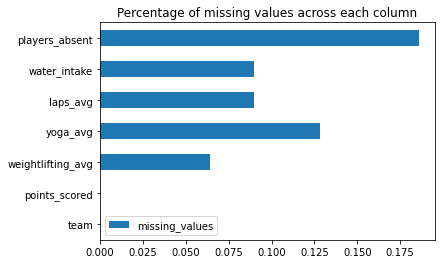

In [84]:
ncounts.plot(kind='barh')
plt.title('Percentage of missing values across each column');

1. pandas way -> f fill and b fill, groupby
2. sklearn way -> simple imputer, iterative and knn
3. LGBM -> light gradient boosting

In [86]:
clean_df.shape, clean_df.dropna(axis=0).shape

((156, 7), (94, 7))

If we decide to just drop the missing values then alot of data will be lost, nearly half of it.

In [87]:
clean_df.shape, clean_df.dropna(axis=1).shape

((156, 7), (156, 2))

## Pandas Imputer

We can only work on one column at a time?

In [88]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 158
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   team               156 non-null    object 
 1   points_scored      156 non-null    int64  
 2   weightlifting_avg  146 non-null    float64
 3   yoga_avg           136 non-null    float64
 4   laps_avg           142 non-null    float64
 5   water_intake       142 non-null    float64
 6   players_absent     127 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [89]:
# weightlifting_avg column first

clean_df['weightlifting_avg'].fillna()

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: weightlifting_avg, Length: 156, dtype: float64

In [91]:
clean_df['weightlifting_avg'].mean(), clean_df['weightlifting_avg'].median()

(25.246575342465754, 24.0)

/Users/deepshika/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


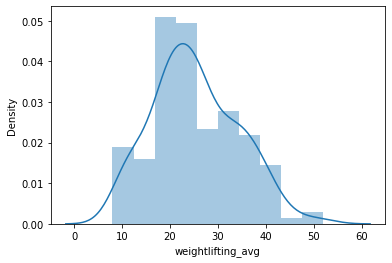

In [92]:
sns.distplot(clean_df['weightlifting_avg'].fillna(clean_df['weightlifting_avg'].mean()));

/Users/deepshika/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


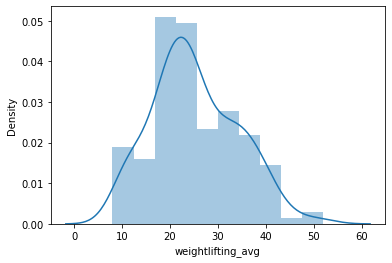

In [93]:
sns.distplot(clean_df['weightlifting_avg'].fillna(clean_df['weightlifting_avg'].median()));

In [98]:
# if we want to impute missing values by teams

team_avg_dict = clean_df.groupby('team').mean()['weightlifting_avg'].to_dict()
team_avg_dict

{'Bulls': 11.214285714285714,
 'Clippers': 29.0,
 'Lakers': 26.04255319148936,
 'Porcupines': 39.42857142857143,
 'Trailblazers': 25.425925925925927,
 'Warriors': 18.727272727272727}

In [102]:
weight_series = clean_df['weightlifting_avg'].replace(team_avg_dict)
weight_series

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: weightlifting_avg, Length: 156, dtype: float64

In [103]:
clean_df['weightlifting_avg'].isnull().sum()

10

/Users/deepshika/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


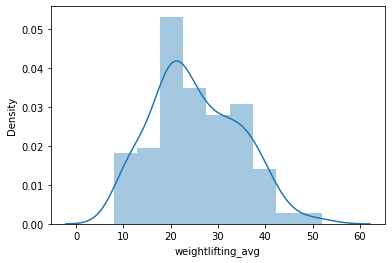

In [105]:
sns.distplot(weight_series);

## Iterative and KNN Imputer -> SKlearn Imputer

In [106]:
# 1. Simple imputer

clean_df.isnull().sum()

team                  0
points_scored         0
weightlifting_avg    10
yoga_avg             20
laps_avg             14
water_intake         14
players_absent       29
dtype: int64

In [ ]:
features = ['weightlifting_avg', 'yoga_avg', 'laps_avg', 'water_intake', 'players_absent']